### Student Information
Name:陳子維

Student ID:108062582

GitHub ID:ken8641

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here 
#First is in the other folder

In [2]:
#second part read data and save in df
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import numpy as np
from glob import glob
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline 
import helpers.data_mining_helpers as dmh
filepath_dict = {'yelp':r"C:\Users\ken\Downloads\DM2021-Lab1-Homework-main\sentiment labelled sentences\yelp_labelled.txt",
                 'amazon':r"C:\Users\ken\Downloads\DM2021-Lab1-Homework-main\sentiment labelled sentences\amazon_cells_labelled.txt",
                 'imdb':r"C:\Users\ken\Downloads\DM2021-Lab1-Homework-main\sentiment labelled sentences\imdb_labelled.txt"}
categories = ['amazon', 'imdb', 'yelp']
df_list=[]
ind=0
for source, filepath in filepath_dict.items():
    
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    
    
    df_list.append(df)
    
df = pd.concat(df_list)

print("\n".join(df['sentence']).split("\n"))


['Wow... Loved this place.', 'Crust is not good.', 'Not tasty and the texture was just nasty.', 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.', 'The selection on the menu was great and so were the prices.', 'Now I am getting angry and I want my damn pho.', "Honeslty it didn't taste THAT fresh.)", 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.', 'The fries were great too.', 'A great touch.', 'Service was very prompt.', 'Would not go back.', 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.', 'I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!', 'I was disgusted because I was pretty sure that was human hair.', 'I was shocked because no signs indicate cash only.', 'Highly recommended.', 'Waitress was a little slow in service.', 'This place is not worth your time, let alone Vegas.', 'did not like at all.', 'The Burrittos Bl

In [3]:
#print(df[:1]['sentence'])
df_list=pd.DataFrame.from_records(df, columns=['sentence', 'label','source'])


In [4]:
print(df_list[:10])

                                            sentence  label source
0                           Wow... Loved this place.      1   yelp
1                                 Crust is not good.      0   yelp
2          Not tasty and the texture was just nasty.      0   yelp
3  Stopped by during the late May bank holiday of...      1   yelp
4  The selection on the menu was great and so wer...      1   yelp
5     Now I am getting angry and I want my damn pho.      0   yelp
6              Honeslty it didn't taste THAT fresh.)      0   yelp
7  The potatoes were like rubber and you could te...      0   yelp
8                          The fries were great too.      1   yelp
9                                     A great touch.      1   yelp


In [5]:
len(df)

2748

In [6]:
df.iloc[0]

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object

In [7]:
df.isnull()

,sentence,label,source
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
743,False,False,False
744,False,False,False
745,False,False,False
746,False,False,False


In [8]:
df.isnull().apply(lambda df: dmh.check_missing_values(df))

,sentence,label,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [9]:
df.isnull().apply(lambda df: dmh.check_missing_values(df),axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
743    (The amoung of missing records is: , 0)
744    (The amoung of missing records is: , 0)
745    (The amoung of missing records is: , 0)
746    (The amoung of missing records is: , 0)
747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

In [10]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "label"])
dummy_series

sentence    dummy_record
label                  1
dtype: object

In [11]:
result_with_series = df.append(dummy_series, ignore_index=True)
len(result_with_series)

2749

In [12]:
result_with_series.isnull().apply(lambda df: dmh.check_missing_values(df))

,sentence,label,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [13]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'label': 1,
               'source':'yelp'
              }]

In [18]:
df = df.append(dummy_dict, ignore_index=True)
df.isnull().apply(lambda df: dmh.check_missing_values(df))

,sentence,label,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [19]:
df.dropna(inplace=True)
df.isnull().apply(lambda df: dmh.check_missing_values(df))

,sentence,label,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [20]:
len(df)

2749

In [21]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2744    False
2745    False
2746    False
2747    False
2748    False
Length: 2749, dtype: bool

In [22]:
sum(df.duplicated('sentence'))

17

In [23]:
sum(df.duplicated())

17

In [24]:
dummy_duplicate_dict = [{
                             'sentence': 'dummy record',
                             'label': 1, 
                             'source': "dummy category"
                        },
                        {
                            'sentence': 'dummy record',
                             'label': 1, 
                             'source': "dummy category"
                        }]

In [25]:
df = df.append(dummy_duplicate_dict, ignore_index=True)

In [26]:
len(df)

2751

In [27]:
sum(df.duplicated('sentence'))

18

In [28]:
df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [29]:
len(df)

2715

In [30]:
sum(df.duplicated('sentence'))

0

In [31]:
df_sample = df.sample(n=1000) #random state

In [32]:
len(df_sample)

1000

In [33]:
df_sample[:4]

,sentence,label,source
1907,How stupid is that?,0,amazon
1888,Don't trust their website and don't expect any...,0,amazon
978,I vomited in the bathroom mid lunch.,0,yelp
2260,"This gets a 1 out of 10, simply because there'...",0,imdb


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
categories

['amazon', 'imdb', 'yelp']

yelp      993
amazon    980
imdb      742
Name: source, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

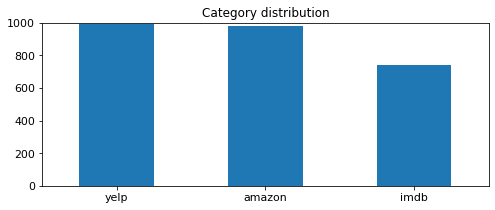

In [35]:
print(df.source.value_counts())

# plot barchart for X_sample
df.source.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

yelp      372
amazon    342
imdb      286
Name: source, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

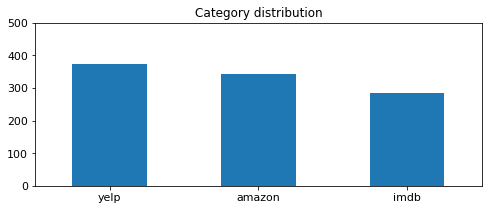

In [36]:
print(df_sample.source.value_counts())

# plot barchart for X_sample
df_sample.source.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 500],        
                                    rot = 0, fontsize = 11, figsize = (8,3))


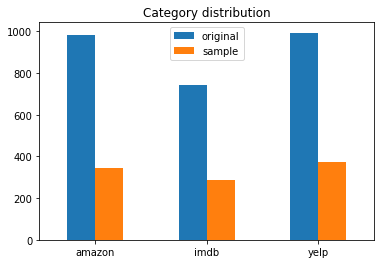

In [37]:
s1 = pd.Series(df.source.value_counts())
s2 = pd.Series(df_sample.source.value_counts())

df = pd.concat([s1, s2], axis=1, sort=True)
df.columns = ["original", "sample"]

df.plot(kind="bar",rot=0,title='Category distribution')
plt.show()


In [38]:
df_list['unigram'] = df_list.sentence.apply(lambda df: dmh.tokenize_text(df))

In [39]:
df_list[:4]['unigram']

0                    [Wow, ..., Loved, this, place, .]
1                            [Crust, is, not, good, .]
2    [Not, tasty, and, the, texture, was, just, nas...
3    [Stopped, by, during, the, late, May, bank, ho...
Name: unigram, dtype: object

In [40]:
df_list[:4]

,sentence,label,source,unigram
0,Wow... Loved this place.,1,yelp,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,yelp,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,yelp,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,yelp,"[Stopped, by, during, the, late, May, bank, ho..."


In [41]:
list(df_list[0:1]['unigram'])

[['Wow', '...', 'Loved', 'this', 'place', '.']]

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_list_counts = count_vect.fit_transform(df_list.sentence)

In [43]:
analyze = count_vect.build_analyzer()
analyze("Crust is not good.")

['crust', 'is', 'not', 'good']

In [44]:
analyze(" ".join(list(df_list[4:5].sentence)))

['the',
 'selection',
 'on',
 'the',
 'menu',
 'was',
 'great',
 'and',
 'so',
 'were',
 'the',
 'prices']

In [45]:
df_list.shape

(2748, 4)

In [46]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [47]:
df_list_counts[0:100, 0:4].toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0,

In [48]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
count_vect.transform(['10 Something completely new.']).toarray()

array([[0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [51]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [52]:
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [53]:
plot_y

['doc_amazon', 'doc_imdb', 'doc_yelp']

In [92]:
plot_z = df_list_counts[0:3, 0:20].toarray()

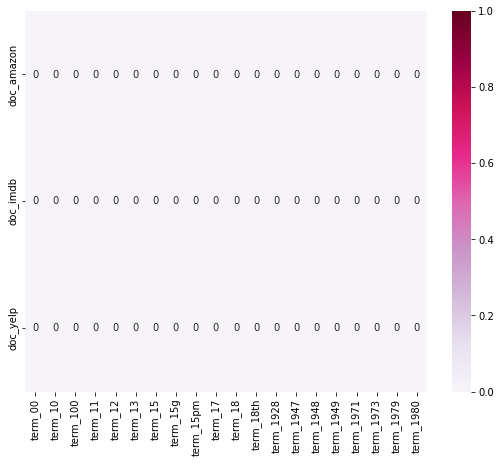

In [93]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [94]:
from sklearn.decomposition import PCA

In [95]:
X_reduced = PCA(n_components = 3).fit_transform(df_list_counts.toarray())

In [96]:
X_reduced.shape

(2748, 3)

In [97]:
categories

['amazon', 'imdb', 'yelp']

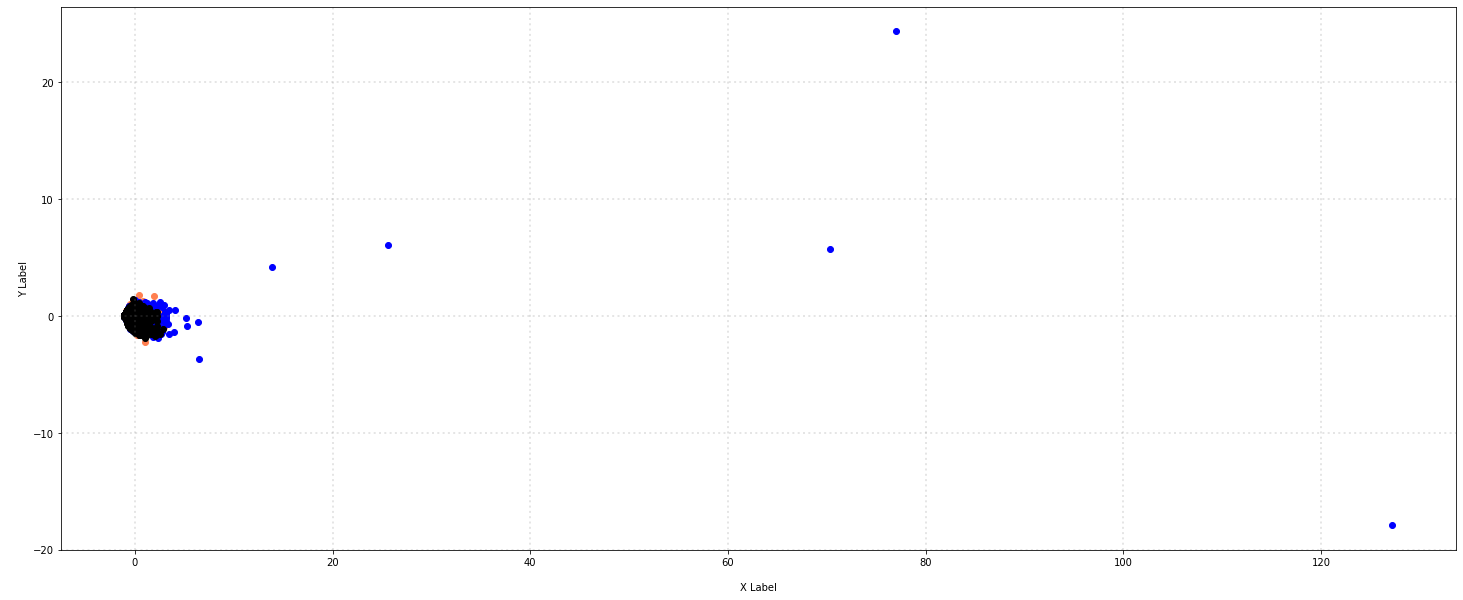

In [98]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[df_list['source'] == category].T[0]
    ys = X_reduced[df_list['source'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()


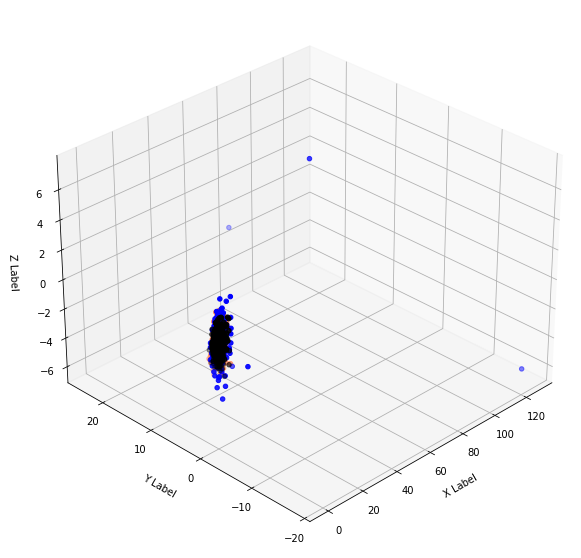

In [99]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



col = ['coral', 'blue', 'black', 'm']
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111,projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[df_list['source'] == category].T[0]
    ys = X_reduced[df_list['source'] == category].T[1]
    zs=X_reduced[df_list['source'] == category].T[2]
    ax.scatter(xs, ys,zs, c = c, marker='o')
ax.set_zlabel('\nZ Label', rotation=90) 
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.azim = 225
plt.show()

In [100]:
term_frequencies = []
for j in range(0,df_list_counts.shape[1]):
    term_frequencies.append(sum(df_list_counts[:,j].toarray()))

In [101]:
term_frequencies = np.asarray(df_list_counts.sum(axis=0))[0]

<AxesSubplot:>

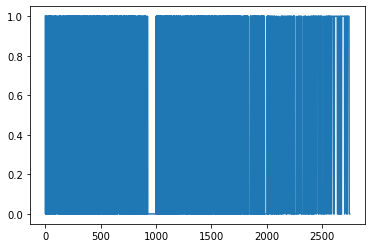

In [102]:
#3rd first part:data visualizations
df_list.label.plot()

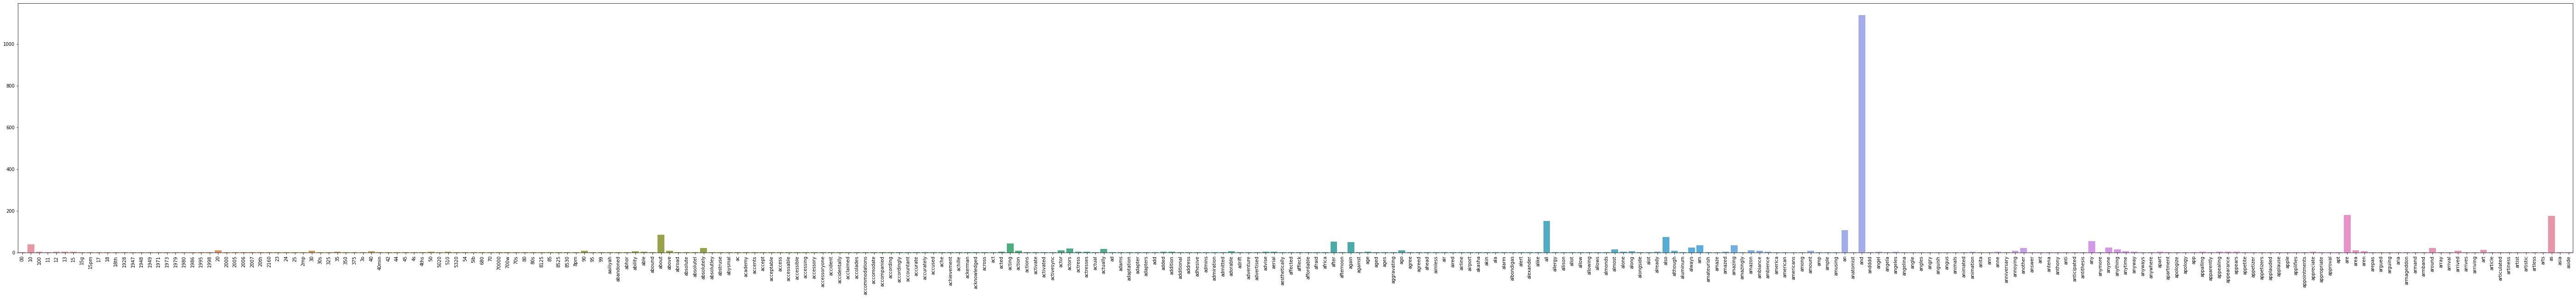

In [103]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

<AxesSubplot:>

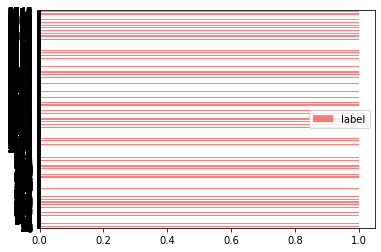

In [104]:
df_list.plot.barh(color='r', alpha=0.5)

<AxesSubplot:>

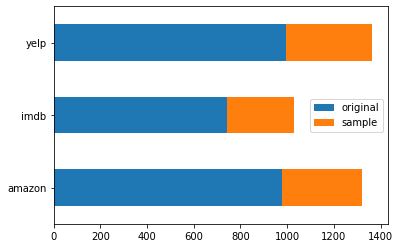

In [105]:
df.plot.barh(stacked=True, alpha=1)

In [88]:
#3rd second part:Generate TF-IDF features from the tokens of each text.(1)Tfidf(2)Bag
#Tfid features
!python -m pip install -U gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ken\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [69]:
## function to perform lemmatize and stem preprocessing steps on the data set.

stemmer = PorterStemmer()

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [71]:
doc_sample = df_list['sentence'].sample().values[0]
print(doc_sample)
print(preprocess(doc_sample))

Display is excellent and camera is as good as any from that year.
['display', 'excel', 'camera', 'good', 'year']


In [73]:
processed_docs = df_list['sentence'].map(preprocess)

In [74]:
processed_docs.head()


0                                        [love, place]
1                                        [crust, good]
2                               [tasti, textur, nasti]
3    [stop, late, bank, holiday, rick, steve, recom...
4                         [select, menu, great, price]
Name: sentence, dtype: object

In [75]:
dictionary = gensim.corpora.Dictionary(processed_docs)

count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 love
1 place
2 crust
3 good
4 nasti
5 tasti
6 textur
7 bank
8 holiday
9 late
10 recommend


In [76]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [77]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [78]:
## Preview Bag Of Words for our sample preprocessed document

bow_doc_1234 = bow_corpus[1234]
for i in range(len(bow_doc_1234)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_1234[i][0], 
                                               dictionary[bow_doc_1234[i][0]], 
bow_doc_1234[i][1]))

Word 159 ("product") appears 1 time.


In [79]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [80]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.7436404725978057), (1, 0.6685797241275809)]


In [81]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [82]:
## For each topic, we will explore the words occuring in that topic and its relative weight
#Using bag of words feature
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.118*"great" + 0.082*"work" + 0.079*"place" + 0.036*"good" + 0.036*"money" + 0.035*"wast" + 0.034*"time" + 0.027*"order" + 0.026*"food" + 0.023*"go"
Topic: 1 
Words: 0.058*"product" + 0.057*"film" + 0.040*"want" + 0.037*"work" + 0.030*"qualiti" + 0.028*"happi" + 0.028*"fine" + 0.027*"good" + 0.027*"return" + 0.024*"easi"
Topic: 2 
Words: 0.117*"movi" + 0.036*"film" + 0.031*"servic" + 0.029*"recommend" + 0.029*"like" + 0.024*"thing" + 0.023*"watch" + 0.021*"think" + 0.021*"minut" + 0.021*"suck"
Topic: 3 
Words: 0.069*"film" + 0.064*"like" + 0.041*"excel" + 0.039*"come" + 0.034*"headset" + 0.026*"peopl" + 0.024*"plot" + 0.022*"look" + 0.020*"funni" + 0.020*"work"
Topic: 4 
Words: 0.054*"nice" + 0.048*"great" + 0.047*"right" + 0.045*"look" + 0.038*"disappoint" + 0.034*"phone" + 0.026*"beauti" + 0.025*"love" + 0.025*"menu" + 0.023*"item"
Topic: 5 
Words: 0.057*"batteri" + 0.055*"good" + 0.042*"charact" + 0.039*"think" + 0.028*"great" + 0.026*"give" + 0.025*"life" + 0.023*

In [85]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [86]:
## For each topic, we will explore the words occuring in that topic and its relative weight
#Using tfidf feature
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.051*"watch" + 0.036*"phone" + 0.033*"thing" + 0.032*"film" + 0.027*"wast" + 0.026*"cool" + 0.026*"play" + 0.025*"stay" + 0.025*"avoid" + 0.024*"product"
Topic: 1 Word: 0.083*"disappoint" + 0.062*"food" + 0.041*"excel" + 0.035*"act" + 0.032*"good" + 0.027*"perform" + 0.026*"price" + 0.025*"time" + 0.025*"small" + 0.022*"fine"
Topic: 2 Word: 0.081*"like" + 0.046*"time" + 0.041*"problem" + 0.032*"phone" + 0.028*"comfort" + 0.027*"batteri" + 0.024*"script" + 0.024*"movi" + 0.023*"price" + 0.022*"believ"
Topic: 3 Word: 0.113*"great" + 0.049*"think" + 0.047*"nice" + 0.041*"food" + 0.035*"phone" + 0.028*"work" + 0.026*"lack" + 0.025*"get" + 0.023*"staff" + 0.022*"wait"
Topic: 4 Word: 0.080*"film" + 0.073*"love" + 0.035*"right" + 0.034*"great" + 0.029*"aw" + 0.028*"servic" + 0.026*"time" + 0.025*"purchas" + 0.023*"piec" + 0.022*"fresh"
Topic: 5 Word: 0.052*"pretti" + 0.043*"impress" + 0.038*"want" + 0.038*"qualiti" + 0.035*"plot" + 0.031*"place" + 0.030*"sound" + 0.029*"worth"

In [ ]:


#import nb libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
for i in string.punctuation:
    english_stop_words.append(i)

sentences = df['sentence'].values
y = df['label'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=42)
vectorizer = CountVectorizer(stop_words=english_stop_words)
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

In [ ]:
#NB using Term Frequency vectorizer
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values
    
    sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
    vectorizer = CountVectorizer(stop_words=english_stop_words)
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)
    
    classifier = BernoulliNB()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score))

In [ ]:
#NB+term frequency predict the new document from the testing dataset
from time import time
t = time()
y_pred = classifier.predict(X_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)
#Accuracy=(TP+TN)/(Total N)
print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
#confusion matrix:1:TP 2:FP
#                 3:FN 4:TN
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')


In [ ]:
#NB using Tfid vectorizer
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values
    
    sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
    vectorizer = TfidfVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)
    
    classifier = BernoulliNB()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score))

In [ ]:
print(X_train)


In [ ]:
print(X_test)

In [ ]:
#NB+tfidf predict the new document from the testing dataset
from time import time
t = time()
y_pred = classifier.predict(X_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)
#Accuracy=(TP+TN)/(Total N)
print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
#confusion matrix:1:TP 2:FP
#                 3:FN 4:TN
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')
